## Fundamentos de estadistica ## 

In [5]:
import pandas as pd
datos = pd.read_csv('base (1).csv')
datos.head()

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## 1. Estadistica descriptiva
Distribuciones de frecuencia, frecuencias es el número de veces que se produce un valor de los datos.
El calculo de frecuencias se hace con ''value_counts ( )''
### 1.1 Distribuciones de frecuencia

In [6]:
frecuencia = datos['Sexo'].value_counts()
frecuencia

0    53250
1    23590
Name: Sexo, dtype: int64

In [7]:
#Al adicionar normalize True, muestra los 
# registros en valores de 0,0, y al multiplicar por 100 obtengo
# el valor porcentual
frecuencia_relativa = datos['Sexo'].value_counts(normalize=True)
frecuencia_relativa

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [8]:
#Al adicionar normalize True, muestra los 
# registros en valores de 0,0, y al multiplicar por 100 obtengo
# el valor porcentual
porcentual = datos['Sexo'].value_counts(normalize=True)*100
porcentual

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [9]:
distr_frecuencias_sexo = pd.DataFrame({'Frecuencia': frecuencia, 'Porcentual (%)': porcentual})
distr_frecuencias_sexo

,Frecuencia,Porcentual (%)
0,53250,69.299844
1,23590,30.700156


##### Distribuciones de frecuencia para más de una variable cualitativa

Crosstab hace un calculo simple cruzando dos o mas variables. 
cruce_datos = 
pd.crosstab((fila datos.Sexo), (columnas datos.Color))

In [10]:
cruce_datos = pd.crosstab(datos.Sexo, datos.Color)
cruce_datos

Color,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [11]:
sexo = {0: 'Masculino',
        1: 'Femenino'}

color = {0: 'Indígena',
         2: 'Blanca',
         4: 'Negra',
         6: 'Amarilla',
         8: 'Marrón',
         9: 'NA'}

In [12]:
cruce_frecuencias_porcentaje = pd.crosstab(datos.Sexo, datos.Color, normalize=True) *100
cruce_frecuencias_porcentaje.rename(index = sexo, inplace= True)
cruce_frecuencias_porcentaje.rename(columns= color, inplace= True)
cruce_frecuencias_porcentaje

Color,Indígena,Blanca,Negra,Amarilla,Marrón
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Femenino,0.131442,12.520822,3.759761,0.152264,14.135867


In [13]:
cruce_frecuencias_porcentaje = pd.crosstab(datos.Sexo, datos.Color, aggfunc= 'mean', values=datos.Renta)
cruce_frecuencias_porcentaje.rename(index = sexo, inplace= True)
cruce_frecuencias_porcentaje.rename(columns= color, inplace= True)
cruce_frecuencias_porcentaje


Color,Indígena,Blanca,Negra,Amarilla,Marrón
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Femenino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


Se relaciona el sexo, color y renta, cada valor en las filas representa la media de las rentas y las columnas el color de piel. 

#### Tabla de frecuencias, ley de Sturges
Es una regla práctica para calcular el número de clases (partes iguales) que se deben considerar al elaborar un histograma

k=1 + (10/3)log10(n)

In [14]:
import numpy as np
n = datos.shape[0]
n
k = 1 + (10/3) * np.log10(n)
k = int(k.round(0))
k

17

In [15]:
frecu_nueva = pd.value_counts(
    pd.cut(
        x = datos.Renta,
        bins= k,
        include_lowest=True,
    ),
    sort=False
)
frecu_nueva

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renta, dtype: int64

In [16]:
porcen_nueva = pd.value_counts(
    pd.cut(
        x = datos.Renta,
        bins= k,
        include_lowest=True,
    ),
    sort=False, 
    normalize=True
)
porcen_nueva

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Renta, dtype: float64

In [17]:
distribucion_frec_cuantitativas = pd.DataFrame({'Frecuencia': frecu_nueva, 'Porcentual (%)':porcen_nueva})
distribucion_frec_cuantitativas

,Frecuencia,Porcentual (%)
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


#### 1.2 Histogramas 
Es la representacion grafica de una distribución de frecuencias.

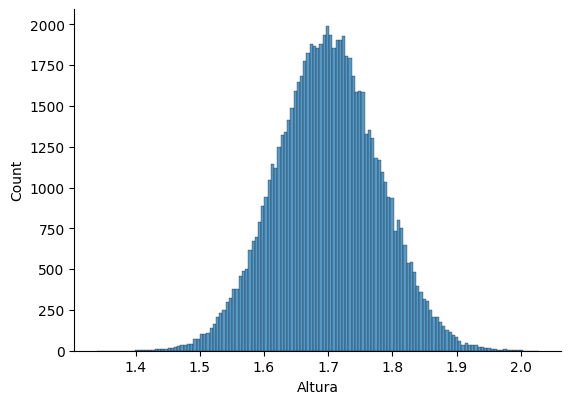

In [18]:
import seaborn as sns
histo = sns.displot(datos.Altura, kde=False)
histo.figure.set_size_inches(6,4)


#### 1.3 Media aritmetica 


In [19]:
datos.Edad.mean()

44.07142113482561

In [20]:
datos.groupby(['Sexo'])['Renta'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renta, dtype: float64

#### 1.4 Mediana

In [21]:
test = datos.tail(5)
test

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344
76839,53,0,38,8,4,900,1.658305


In [22]:
test = test.Años_Estudio.sort_values()
test = test.reset_index().Años_Estudio
test

0     4
1     4
2     7
3    11
4    12
Name: Años_Estudio, dtype: int64

In [23]:
n_2 = test.shape[0]
elemento_md = (n_2 +1)/2
test.loc[elemento_md -  1]

7

In [24]:
test.median()


7.0

In [25]:
test.mean()

7.6

#### 1.5 Moda
La moda se puede definir como el valor más frecuente en un conjunto de datos. La moda se usa a menudo para datos cualitativos.

In [26]:
datos.Renta.mode()

0    788
Name: Renta, dtype: int64

#### 1.6 Cuartiles, deciles y percentiles 
Medidas de posición.
Los cuartiles, dividen la distribución en cuatro partes iguales en función del número de elementos en cada una; deciles en diez partes y percentiles en cien partes iguales.

In [27]:
datos.Renta.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renta, dtype: float64

In [28]:
datos.Renta.describe()

count     76840.000000
mean       2000.383199
std        3323.387730
min           0.000000
25%         788.000000
50%        1200.000000
75%        2000.000000
max      200000.000000
Name: Renta, dtype: float64

In [29]:
datos.Renta.quantile([i/100 for i in range(1,100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renta, Length: 99, dtype: float64

#### 1.7 Box-plot 
Grafica que permite visualizar la dispersión, asimetria, colas y valores atipicos.
La posición central esta dada por la mediana

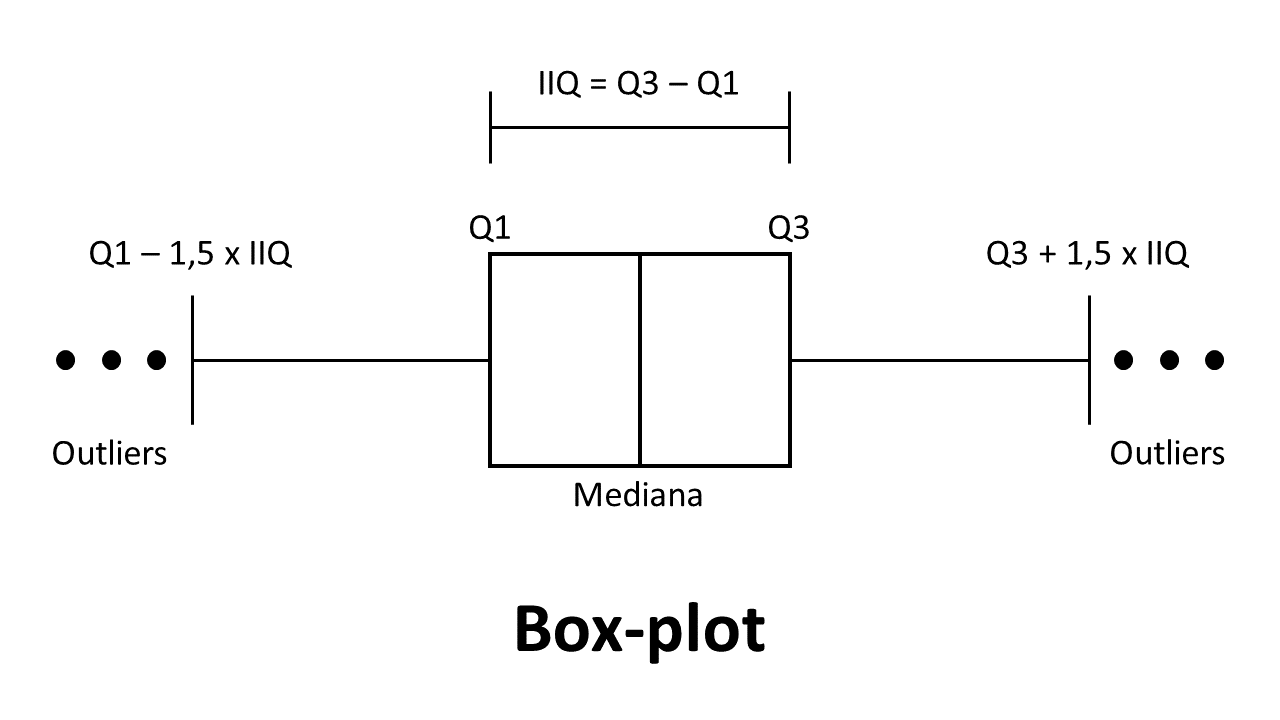

<AxesSubplot:title={'center':'Altura'}, xlabel='metros'>

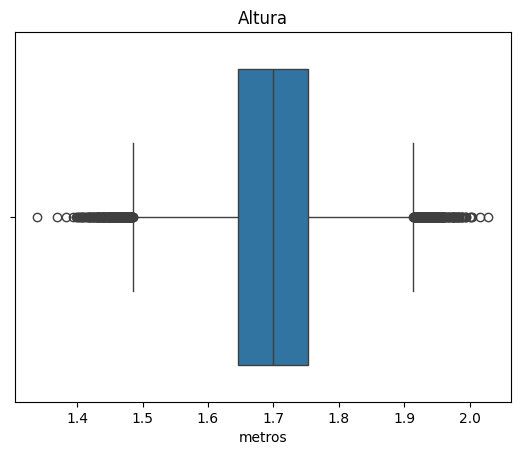

In [30]:
ax = sns.boxplot(x="Altura", data=datos, orient="h")
ax.set_title('Altura')
ax.set_xlabel("metros")
ax

<AxesSubplot:title={'center':'Altura vs Sexo'}, xlabel='metros', ylabel='Sexo'>

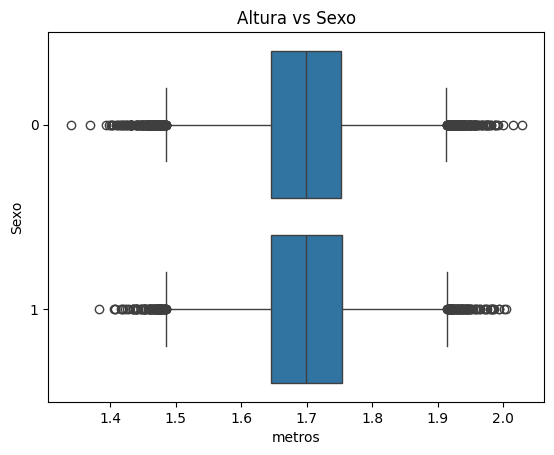

In [31]:
ax_sex = sns.boxplot(x="Altura", y="Sexo", data=datos, orient="h")
ax_sex.set_title('Altura vs Sexo')
ax_sex.set_xlabel("metros")
ax_sex

<AxesSubplot:title={'center':'Renta'}, xlabel='$', ylabel='Sexo'>

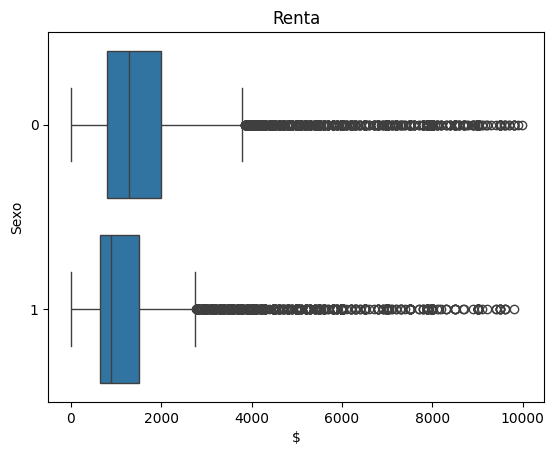

In [32]:
ax_renta = sns.boxplot(x="Renta", y="Sexo", data=datos.query('Renta < 10000'), orient="h")
ax_renta.set_title('Renta')
ax_renta.set_xlabel("$")
ax_renta

### Medidas de dispersión
#### 1.8 Desviación Media Absoluta
Me permite ver que tan lejos estan mis datos de la media arimetica 


In [33]:
des_media_abs = datos[['Edad']].tail(8)
des_media_abs

,Edad
76832,49
76833,30
76834,35
76835,46
76836,30
76837,32
76838,57
76839,38


In [34]:
edad_media = des_media_abs.mean()[0]
print (edad_media)
des_media_abs['Desviacion'] =des_media_abs['Edad'] - edad_media
des_media_abs

39.625


,Edad,Desviacion
76832,49,9.375
76833,30,-9.625
76834,35,-4.625
76835,46,6.375
76836,30,-9.625
76837,32,-7.625
76838,57,17.375
76839,38,-1.625


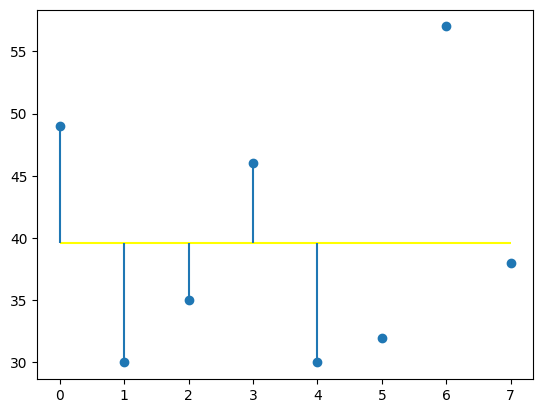

In [35]:
des_media_abs = des_media_abs.reset_index()
figura = des_media_abs['Edad'].plot(style='o')
figura.hlines(y=edad_media, xmin=0, xmax=des_media_abs.shape[0] - 1, color= 'yellow'
              )
for i in range(test.shape[0]):
    figura.vlines(x = i, ymin= edad_media, ymax= des_media_abs['Edad'][i])

La linea amarilla corresponde a la media, los punto azules corresponden a cada registro y la linea azul es la desviación de la edad del registro sobre la media, que tan lejos esta de la media. Es importante en ML cuando el modelo genera las prediciones serian los puntos pronosticados, la linea lo que realmente pasó, cuando se ve la distancia entre los resultados y lo que realmente pasó se puede afinar para estar mas cerca de la media. 

In [36]:
des_media_abs['Desviacion'].abs().mean()

8.28125

In [37]:
des_media_abs['Edad'].mad()

8.28125

#### 1.9 Varianza
La varianza se construye a partir de las diferencias entre cada observación y la media de los datos, es decir, la desviación alrededor de la media. Al calcular la varianza, las desviaciones alrededor de la media se elevan al cuadrado.

In [38]:
des_media_abs = des_media_abs [['Edad','Desviacion']]
des_media_abs

,Edad,Desviacion
0,49,9.375
1,30,-9.625
2,35,-4.625
3,46,6.375
4,30,-9.625
5,32,-7.625
6,57,17.375
7,38,-1.625


In [39]:
des_media_abs['(Desviacion)^2'] = des_media_abs['Desviacion'].pow(2)
des_media_abs

,Edad,Desviacion,(Desviacion)^2
0,49,9.375,87.890625
1,30,-9.625,92.640625
2,35,-4.625,21.390625
3,46,6.375,40.640625
4,30,-9.625,92.640625
5,32,-7.625,58.140625
6,57,17.375,301.890625
7,38,-1.625,2.640625


In [40]:
variazna = des_media_abs['(Desviacion)^2'].sum()/(len(des_media_abs)-1)
print(variazna)
variazna = des_media_abs['Edad'].var()
variazna

99.69642857142857


99.69642857142857

#### 1.10 Desviación estandar
Una de las limitaciones de la varianza es que proporciona medidas en cuadrados de las unidades originales; por ejemplo, la varianza de las medidas de longitud está en unidades de área. Por tanto, el hecho de que las unidades sean diferentes dificulta la comparación de la dispersión con las variables que la definen. Una forma de eliminar esta dificultad es considerar su raíz cuadrada.

##### Desviación estandar muestral

In [41]:
import numpy as np

In [42]:
np.sqrt(variazna)

9.98480989160177

In [43]:
des_media_abs['Edad'].std()

9.98480989160177

In [44]:
datos.describe()

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


## 2. Estadistica inferencial
Se encarga de estudiar la manera de obtener conclusiones generales para una población, a partir de los datos de la muestray el grado de fiabilidad de los resultados obtenidos.
Las herramientas que se necesitan son el muestreo, la estimación de paramétros y el contraste de hipótesis.


### 2.1 Distribución binomial
Evento bonomial: se caracteeriza por la posibilidad de ocurrencia solo 2 categorias, que juntas representan todo el espacio muestal y son mutuamente excluyente (no pueden suceder al mismo tiempo)
En el analisis estadistico se usa la distribución binomial para resolver situaciones de exito y fracaso.
 
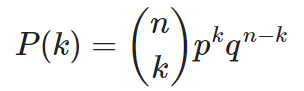

#### Combinaciones
Las combinaciones son agrupaciones en las que el contenido importa pero el orden no. 
Las permutaciones son agrupaciones en las que importa el orden de los objetos. 
Es importante resaltar que la expresión entre paréntesis no es una expresión matricial, sino que es el resultado de una combinación sin repetición. Este se obtiene con la siguiente fórmula:

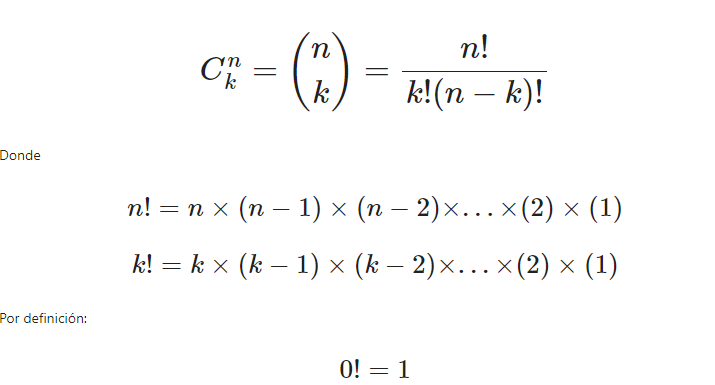

SciPy es una colección de algoritmos matemáticos y funciones de conveniencia construidas en NumPy . Agrega un poder significativo a Python al proporcionar al usuario comandos y clases de alto nivel para manipular y visualizar datos.

In [45]:
from scipy.special import comb

##### Ejemplo: Mega Sorteo
En un billete de lotería Mega Sorteo tenemos un total de 60 números a elegir donde la apuesta mínima es de seis números. Tú que tienes curiosidad decides calcular la probabilidad de ganar el Mega Sorteo con solo un juego. Para ello necesitamos saber cuántas combinaciones de seis números se pueden formar con los 60 números disponibles.

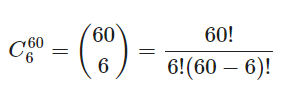

In [46]:
combinaciones = comb(60, 6)
combinaciones

50063860.0

Se pueden combinar 50063860.0 de veces 6 numeros entre un total de 60 numeros. Hay 50 millones de posibles combinaciones con esos datos, por eso es dificil acertar al tablero ganador, porque la probabilidad de ganar es de 1 entre 50 millones

In [47]:
probabilidad = 1 / (combinaciones)
print(probabilidad)
print('%0.15f' % probabilidad)

1.997448858318156e-08
0.000000019974489


#### Ejemplo: Concurso para Data Scientist
En un concurso para cubrir una vacante de científico de datos tenemos un total de 10 preguntas de opción múltiple con 3 alternativas posibles en cada pregunta. Cada pregunta tiene el mismo valor. Supongamos que un candidato decide aventurarse sin haber estudiado nada en absoluto. Decide tomar la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba vale 10 puntos y el puntaje de corte es 5, obtenga la probabilidad de que este candidato responda correctamente 5 preguntas y también la probabilidad de que este candidato pase a la siguiente etapa del proceso de selección.

¿Cual es la cantidad de preguntas o ensayos (n)?

In [48]:
n = 10
n

10

¿Cuál es la probabilidad de éxito (p)?, se refiere al exito en cada respuesta en cada pregunta. 

In [49]:
p = 1/3
p

0.3333333333333333

¿Cuál es la probabilidad de fracaso (q)? se refiere al fracaso en cada respuesta en cada pregunta.

In [50]:
q = 1-p
q

0.6666666666666667

¿Cuál es el número de eventos que se desea tener éxito (k)? del total de preguntas, la probabilidad que responda bien ... 

In [51]:
k = 5

Solución 1

In [52]:
probabilidad_entrevista = comb(n,k) * (p ** k) * (q ** (n-k))
probabilidad_entrevista

0.13656454808718185

Solución 2\
Hacinedo uso de Scipy, para una variable aleatoria discreta binomial\
Probability mass function = pmf(k, n, p, loc=0) 

In [53]:
from scipy.stats import binom

In [54]:
probabilidad_entre = binom.pmf(k, n, p)
probabilidad_entre

0.13656454808718146

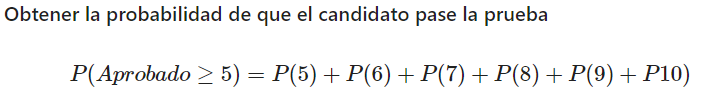

In [55]:
binom.pmf(5, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p) +  binom.pmf(10, n, p)


0.21312808006909476

In [56]:
binom.pmf([5, 6, 7, 8, 9, 10], n, p).sum()

0.21312808006909476

#### Ejemplo: Yincana
En un pueblo se organiza una yincana todos los años para recaudar fondos para el hospital de la ciudad. Se sabe que la proporción de mujeres participantes en la yincana es del 60%. El número total de equipos, con 12 integrantes, inscritos para la yincana de este año es de 30. Con la información anterior responde: ¿Cuántos equipos deben estar formados por 8 mujeres?

Solución

In [57]:
p = 0.6
p

0.6

In [58]:
n = 12
n

12

In [59]:
k = 8
k

8

In [60]:
probabilidad = binom.pmf(k, n, p)
print(probabilidad)

0.21284093951999997


Ese resultado de probabilidad corresponde a la probabilidad de que un equipo este conformado por 8 mujeres de manera general, sin embargo, no responde la pregunta de la cantidad de equipos que se pueden formar. 

#### Media de la distribución binomial
El valor esperado o la media de una distribución binomial es igual al número de experimentos realizados multiplicado por la posibilidad de que ocurra el evento.

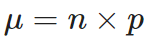

In [61]:
equipos= 30 * probabilidad
equipos

6.385228185599999

#### Ejercicio 
Considere un experimento binomial con 10 ensayos y p=0,9. Calcular: 

a. la probabilidad de obtener 9 éxitos 

b. la probabilidad de obtener 9 o más éxitos.

Solución: 


In [62]:
p = 0.9 
n = 10 
k = 9
probabilidad = binom.pmf(k, n, p)
probabilidad

0.38742048899999976

In [63]:
probabilidad = binom.pmf([9,10], n, p).sum()
probabilidad

0.7360989291

3.Considere un experimento binomial con dos ensayos y 𝑝 = 0,4.

a. Calcular la probabilidad de no obtener ningún éxito.\
b. Calcular la probabilidad de obtener al menos 1 éxito.

Solución

In [64]:
p = 0.4 
n = 2 
k = 0
probabilidad = binom.pmf(k, n, p)
probabilidad

0.36

In [65]:
p = 0.4 
n = 2 
k = 1
probabilidad = binom.pmf(k, n, p).sum()
probabilidad

0.48000000000000015

4. Cuando los discos duros de la marca Matemóvil se prueban, el porcentaje de defectuosos es de 20 %. Sea X = el número de discos duros defectuosos en una
muestra aleatoria de tamaño n=5, así que 𝑋~𝐵(5; 0,2). Representar la distribución de probabilidad de X:\
a. mediante una tabla,\
b. de forma gráfica. 

In [66]:
p = 0.2 
n = 5 
k = range (0, n+1)

probabilidad = [binom.pmf(i, n, p)for i in k]
print (probabilidad)

[0.3276800000000002, 0.4095999999999999, 0.20479999999999987, 0.0512, 0.0063999999999999994, 0.0003200000000000002]


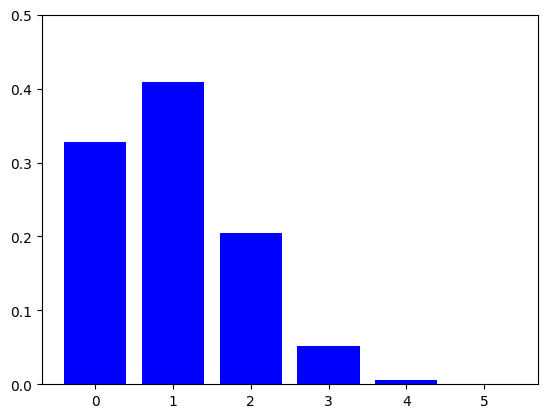

In [67]:
import matplotlib.pyplot as plt
plt.bar(k, probabilidad, color='blue')
plt.ylim(0, 0.5)
plt.show()

### 2.2 Distribución Poisson
Se utiliza para describir el número de ocurrencias en un tiempo o espacio específico. Los eventos se caracterizan por la posibilidad de contar los éxitos, pero la imposibilidad de contar los fracasos.\
Ejemplos de procesos donde podemos aplicar la distribución de Poisson determinar de la cantidad de clientes que ingresan a una tienda a una hora determinada, la cantidad de autos que llegan a un drive-thru de una cafetería a la hora del almuerzo, la determinación de el número de accidentes registrados en un tramo de carretera, etc\
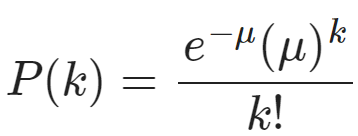

Donde:
e = constante cuyo valor aproximado es 2.718281828459045\
u = representa el número promedio de ocurrencias en un intervalo de tiempo o espacio determinado\
k = número de éxitos en el rango deseado

In [68]:
import numpy as np
np.e

2.718281828459045

#### Ejemplo: Delivery
Un restaurante recibe una media de 20 pedidos por hora. ¿Cuál es la probabilidad de que, en un momento determinado elegido al azar, el restaurante reciba 15 pedidos?\
¿Cuál es el promedio de visitas por hora (u)?

In [69]:
media = 20
media

20

¿Cuántas ocurrencias queremos obtener en el período (k)?

In [70]:
k = 15
k

15

In [71]:
probabilidad = ((np.e ** -media) * (media ** k)) / (np.math.factorial(k))
print('%0.8f' % probabilidad)

0.05164885


In [72]:
from scipy.stats import poisson

probabilidad = poisson.pmf(k, media)
print('%0.8f' % probabilidad)

0.05164885


### 2.3 Distribución Normal
La distribución normal es una de las más utilizadas en estadística. Es una distribución continua, donde la distribución de frecuencias de una variable cuantitativa tiene forma de campana y es simétrica con respecto a su media.\
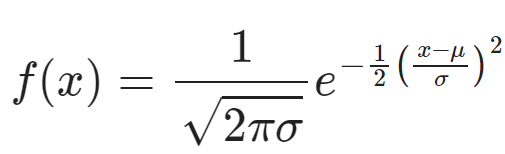


Donde:
 x = variable normal
 o = desviación estándar
 u = media o promedio

La probabilidad se obtiene a partir del área bajo la curva, delimitada por los límites inferior y superior especificados. Un ejemplo se puede ver en la siguiente figura.\
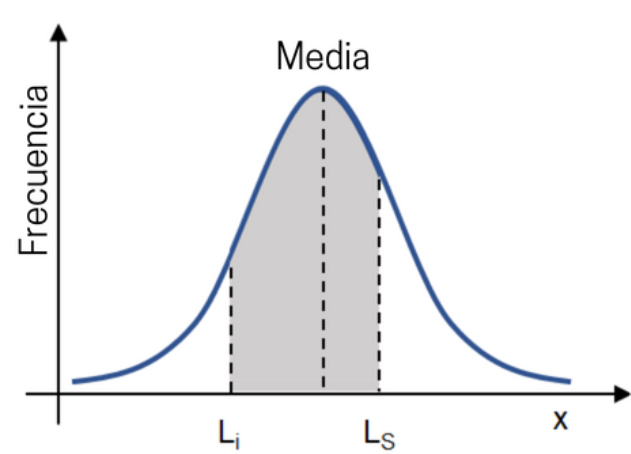

Para obtener el area bajo la curva, se debe calcular la integral de la funcion con los intervalos dados, función de densidad\
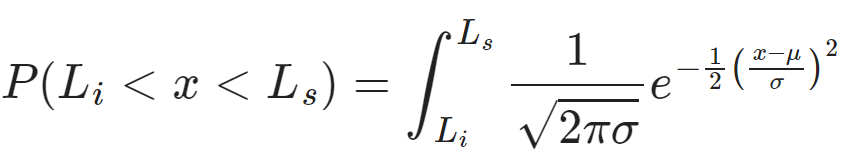
 
Donde:\
x = variable normal\
o= desviación estándar\
u= media o promedio\
L1= límite inferior\
L2= límite superior

Tablas estandarizadas (Tabla Z)
Las tablas estandarizadas se crearon para facilitar la obtención de los valores de las áreas bajo la curva normal y eliminar la necesidad de resolver integrales definidas.

Para consultar los valores en una tabla estandarizada, solo necesitamos transformar nuestra variable en una variable estandarizada Z.

Esta variable Z representa el alejamiento en desviaciones estándares de un valor de la variable original en relación a la media.

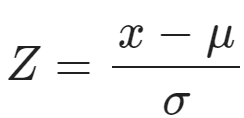
 
Donde:\
x = variable normal con media u y desviación estándar o\
o= desviación estándar\
u = media o promedio

In [73]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabla_estandarizada = pd.DataFrame(
    [],
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabla_estandarizada.index:
    for column in tabla_estandarizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabla_estandarizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabla_estandarizada.rename_axis('Z', axis = 'columns', inplace = True)
tabla_estandarizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


Ejemplo: ¿Cual es tu altura?\
En un estudio sobre las alturas de los habitantes de una ciudad, se encontró que el conjunto de datos sigue una distribución aproximadamente normal, con media 1.70 y desviación estándar de 0.1. Con esta información obtenga el siguiente conjunto de probabilidades:

A. probabilidad de que una persona seleccionada al azar mida menos de 1.80 metros.

B. probabilidad de que una persona seleccionada al azar mida entre 1.60 y 1.80 metros.

C. probabilidad de que una persona seleccionada al azar mida más de 1.90 metros.

In [74]:
media = 1.7
media

1.7

In [75]:
desviacion_estandar = 0.1
desviacion_estandar

0.1

In [76]:
Z = (1.8 - media) / desviacion_estandar
Z

1.0000000000000009

In [77]:
from scipy.stats import norm
norm.cdf(Z)

0.8413447460685431

In [78]:
## pregunta 2
z_inferior = (1.6 - media) / desviacion_estandar
z_inferior

-0.9999999999999987

In [79]:
from scipy.stats import norm
probabilidad = norm.cdf(Z) - norm.cdf(z_inferior)
probabilidad

0.6826894921370857

In [80]:
## pregunta 3
Z_c = (1.9 - media) / desviacion_estandar
Z_c

1.9999999999999996

In [81]:
probabilidad = 1 - norm.cdf(Z_c)
probabilidad

0.02275013194817921

In [82]:
probabilidad =  norm.cdf(-Z_c)
probabilidad

0.022750131948179216

## TECNICAS DE MUESTREO 
### 3.1 Población y muestra
Población\
Conjunto de todos los elementos de interés en un estudio. Varios elementos pueden componer una población, por ejemplo: personas, edades, alturas, automóviles, etc.

En cuanto al tamaño, las poblaciones pueden ser limitadas (poblaciones finitas) o ilimitadas (poblaciones infinitas).
Muestra\
Subconjunto representativo de la población.

Los atributos numéricos de una población, como su media, varianza y desviación estándar, se conocen como parámetros. El objetivo principal de la inferencia estadística es precisamente generar estimaciones y probar hipótesis sobre los parámetros de la población utilizando información muestral.

### 3.2 ¿Cuándo usar una muestra?
Poblaciones infinitas\
El estudio nunca llegaría a su fin. No es posible investigar todos los elementos de la población.

Pruebas destructivas\
Estudios donde los elementos evaluados son totalmente consumidos o destruidos. Ejemplo: pruebas de vida útil, pruebas de seguridad de choque en automóviles.

Resultados rápidos\
Encuestas que necesitan más agilidad en la divulgación. Ejemplo: encuestas de opinión, encuestas sobre temas de salud pública.

Precios Elevados\
Cuando la población es finita pero muy grande, el costo de un censo puede hacer inviable el proceso.

### 3.3 Muestreo aleatorio simple
Es una de las principales formas de extraer una muestra de una población. El requisito fundamental de este tipo de enfoque es que cada elemento de la población tenga las mismas posibilidades de ser seleccionado para formar parte de la muestra

In [83]:
datos.shape[0]

76840

In [84]:
datos.Renta.mean()


2000.3831988547631

In [85]:
muestra = datos.sample(n = 1000, random_state = 101)
muestra.shape[0]

1000

In [86]:
muestra.Renta.mean()

1998.783

In [87]:
datos.Sexo.value_counts(normalize= True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [88]:
muestra.Sexo.value_counts(normalize= True)

0    0.706
1    0.294
Name: Sexo, dtype: float64

### 3.4 Muestreo estratificado
Es una mejora del proceso de muestreo aleatorio simple. Este método propone la división de la población en subgrupos de elementos con características similares, es decir, grupos más homogéneos. Con estos subgrupos separados, se aplica la técnica de muestreo aleatorio simple dentro de cada subgrupo individualmente.

### 3.5 Muestreo por conglomerados
También pretende mejorar el criterio de muestreo aleatorio simple. En el muestreo por conglomerados también se crean subgrupos, pero no serán homogéneos como en el muestreo estratificado. En el muestreo por conglomerados, los subgrupos serán heterogéneos, por lo que se aplicará un muestreo aleatorio simple o estratificado.

Un ejemplo muy común de la aplicación de este tipo de técnicas es en la división de la población en grupos territoriales, donde los elementos investigados tendrán características muy variadas.

## 4. INTERVALO DE CONFIANZA
Es una forma de hacer suposiciones generalizadas sobre los parámetros de una población con base en la información de una muestra.

Parámetros son atributos numéricos de una población, como la media, la desviación estándar, etc.

Estimativa es el valor obtenido para un determinado parámetro a partir de datos de una muestra de la población.

### 4.1 Teorema del límite central
El Teorema del límite central establece que, a medida que aumenta el tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con una media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho es válido para n mayor o igual a 30.
Cuanto mayor sea n, menor será la desviación típica de la distribución muestral.

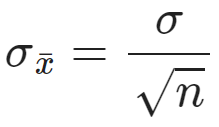

La desviación estándar de las medias muestrales se conoce como error estándar de la media

In [89]:
n = 2000
total_de_muestras = 1500


In [90]:
muestras = pd.DataFrame()
muestras

""


In [91]:
for i in range (total_de_muestras):
  _ = datos.Edad.sample(n)
  _.index = range(0, len(_))
  muestras['Muestras' + str(i)] = _

muestras

C:\Users\Andres\AppData\Local\Temp\ipykernel_22732\2832472022.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestras' + str(i)] = _
C:\Users\Andres\AppData\Local\Temp\ipykernel_22732\2832472022.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestras' + str(i)] = _
C:\Users\Andres\AppData\Local\Temp\ipykernel_22732\2832472022.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

,Muestras0,Muestras1,Muestras2,Muestras3,Muestras4,Muestras5,Muestras6,Muestras7,Muestras8,Muestras9,...,Muestras1490,Muestras1491,Muestras1492,Muestras1493,Muestras1494,Muestras1495,Muestras1496,Muestras1497,Muestras1498,Muestras1499
0,51,28,46,59,41,42,43,34,57,38,...,60,75,58,52,61,60,59,41,49,72
1,30,29,40,45,49,46,47,29,46,27,...,49,41,55,74,27,69,28,37,33,48
2,31,25,35,43,51,45,24,42,38,48,...,57,53,41,43,42,59,59,55,39,61
3,38,27,69,38,40,61,43,42,28,49,...,49,58,31,79,42,39,56,58,39,29
4,48,42,39,64,64,52,51,45,25,42,...,34,22,27,54,52,25,30,44,50,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,55,43,26,42,31,38,32,52,32,51,...,59,49,72,65,52,64,59,38,44,53
1996,58,41,44,35,28,43,41,58,19,42,...,38,30,46,34,67,46,28,58,34,27
1997,52,41,30,51,27,20,45,27,55,35,...,58,32,34,59,46,67,38,42,55,58
1998,33,43,38,26,43,60,33,38,35,52,...,25,44,32,20,29,49,58,31,45,33


In [92]:
muestras.mean()

Muestras0       44.2520
Muestras1       44.3345
Muestras2       44.2135
Muestras3       43.9200
Muestras4       44.0375
                 ...   
Muestras1495    43.8635
Muestras1496    44.2645
Muestras1497    44.3640
Muestras1498    43.8205
Muestras1499    44.1430
Length: 1500, dtype: float64

<AxesSubplot:>

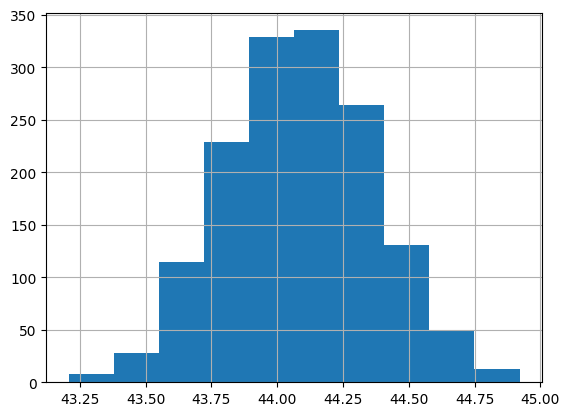

In [93]:
muestras.mean().hist()

El teorema del límite central establece que a medida que aumenta el tamaño de la muestra, la distribución de las medias de la muestra se aproxima a una distribución normal con una media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho es válido para n mayor o igual a 30.

In [94]:
datos.Edad.mean()

44.07142113482561

In [95]:
muestras.mean().mean()

44.085959666666675

In [96]:
datos.Edad.std()

12.48058346535974

In [97]:
muestras.mean().std()

0.28006455263441876

In [98]:
datos.Edad.std() / np.sqrt(n)

0.27907433027404266

otro ejercicio

In [154]:
media = 5
muestras = np.random.exponential(scale= media, size =(2000000, 10))
medias_muestrales = np.mean(muestras, axis=1)
des_estandar = media /np.sqrt(40)
muestras.shape

(2000000, 10)

In [133]:
muestras [7,2:4] 


array([ 0.48715953, 23.93833634])

(array([7.34313023e-06, 2.20293907e-05, 8.81175627e-05, 8.81175627e-05,
        2.12950777e-04, 2.42323298e-04, 6.68224851e-04, 9.39920669e-04,
        1.28504779e-03, 1.74766499e-03, 2.74633071e-03, 3.39252617e-03,
        4.51602509e-03, 6.29306260e-03, 7.77637491e-03, 1.00600884e-02,
        1.28064191e-02, 1.52223090e-02, 1.89012172e-02, 2.35494186e-02,
        2.75293952e-02, 3.21702535e-02, 3.76261993e-02, 4.37870855e-02,
        4.87143259e-02, 5.61455737e-02, 6.29453123e-02, 7.17276961e-02,
        7.87697579e-02, 8.76916612e-02, 9.49687032e-02, 1.04918645e-01,
        1.15066851e-01, 1.24282479e-01, 1.32800510e-01, 1.43198383e-01,
        1.50277160e-01, 1.60315219e-01, 1.69361956e-01, 1.80141671e-01,
        1.85061568e-01, 1.95378666e-01, 2.03419394e-01, 2.11394033e-01,
        2.17430086e-01, 2.23745178e-01, 2.33203130e-01, 2.37873361e-01,
        2.42771228e-01, 2.46743862e-01, 2.49960153e-01, 2.54116365e-01,
        2.56356019e-01, 2.61026250e-01, 2.62803288e-01, 2.637725

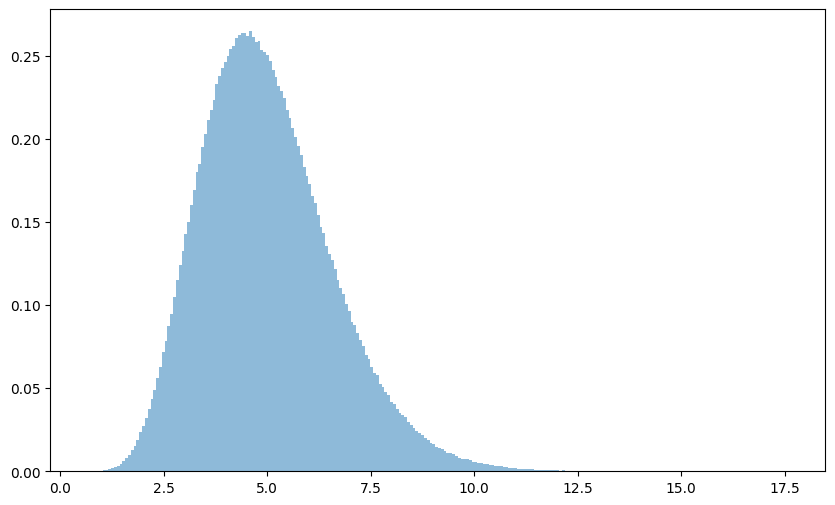

In [155]:
plt.figure(figsize=(10,6))
plt.hist(medias_muestrales, bins=250, density=True, alpha= 0.5)

### 4.2 Niveles de confianza y significación
El nivel de confianza (1-a) representa la probabilidad de que la estimación sea correcta. Además, el nivel de significación (a) expresa la probabilidad de error de estimación.

El nivel de confianza representa el grado de confianza de que el resultado de la estimación se encuentra dentro de un rango determinado. Cuando establecemos un nivel de confianza del 95% en una encuesta, por ejemplo, estamos asumiendo que existe un 95% de probabilidad de que los resultados de la encuesta representen bien la realidad, es decir, que sean correctos.

El nivel de confianza de una estimación se puede obtener del área bajo la curva normal, como se ilustra en la siguiente figura.

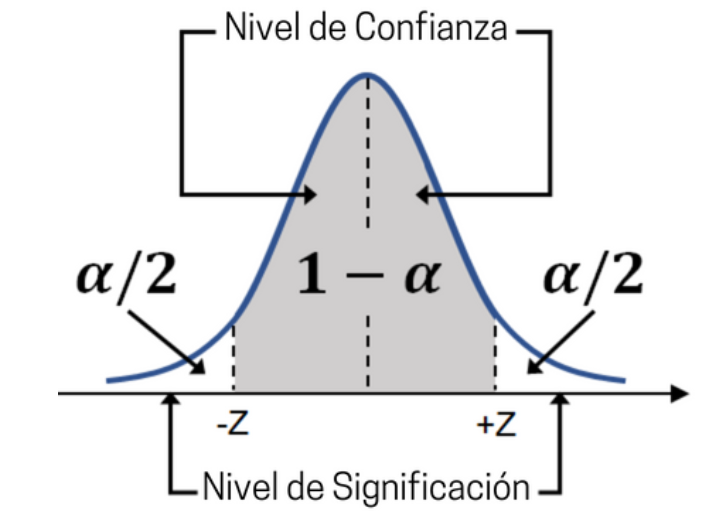

### 4.3 Error inferencial
El error inferencial se define por la desviación estándar de las medias muestrales ox y por el nivel de confianza determinado para el proceso.

 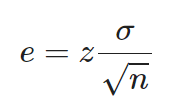

### 4.4 Intervalos de confianza
Intervalo de confianza para la media poblacional\
Con desviación estándar de población conocida

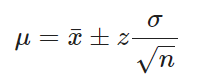

Con desviación estándar de población desconocida

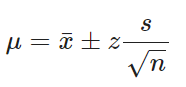

Ejemplo: 

Suponga que los pesos de los sacos de arroz en una industria alimentaria se distribuyen aproximadamente como una normal de desviación estándar poblacional igual a 150 g. Se seleccionó una muestra aleatoria de 20 bolsas de un lote específico, se obtuvo un peso promedio de 5.050 g. Construya un intervalo de confianza para la media poblacional suponiendo un nivel de significancia del 5 %.

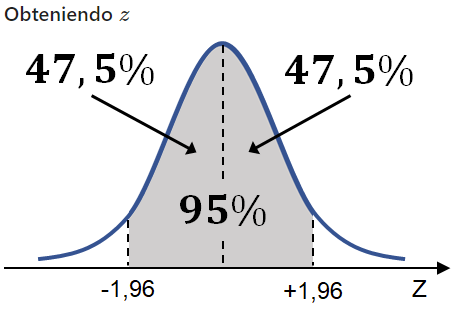

In [101]:
media_muestral = 5050
media_muestral

5050

In [102]:
significacion = 0.05
significacion

0.05

In [103]:
confianza = 1 - significacion
confianza

0.95

In [104]:
desviacion_estandar = 150 
desviacion_estandar

150

In [105]:
0.95 / 2

0.475

In [106]:
0.5 + (0.95 / 2)

0.975

In [107]:
z = norm.ppf(0.975)
z

1.959963984540054

In [108]:
n = 20
n

20

In [109]:
raiz_de_n = np.sqrt(n)
raiz_de_n

4.47213595499958

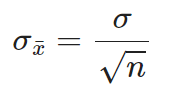

In [110]:
sigma = desviacion_estandar / raiz_de_n
sigma

33.54101966249684

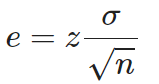

In [111]:
e = z * sigma
e

65.73919054324361

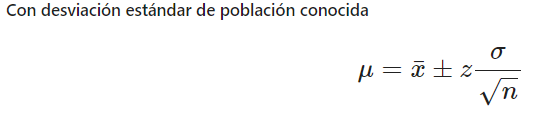

In [112]:
intervalo = (
  media_muestral - e,
  media_muestral + e
)
intervalo

(4984.260809456757, 5115.739190543243)

In [113]:
norm.interval(confidence = 0.95, loc = media_muestral, scale = sigma)


(4984.260809456757, 5115.739190543243)

## 5. TAMAÑO DE UNA MUESTRA
## 5.1 Variables cuantitativas y población infinita
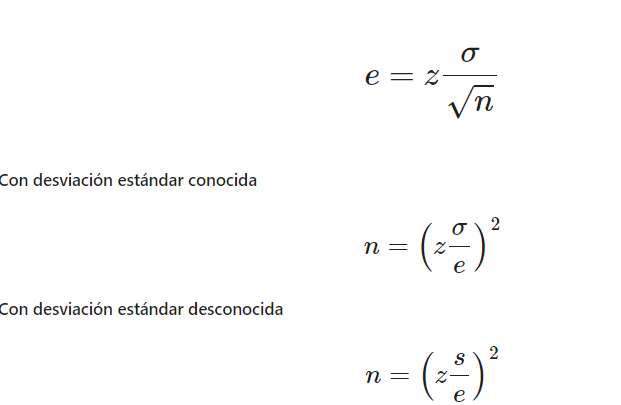

Donde:
 z = variable normal estandarizada

 o- = desviación estándar poblacional

 s = desviación estándar muestral

 e = error inferencial

Ejemplo: Rendimiento promedio
Estamos estudiando el ingreso mensual de los jefes de hogar. Nuestro supervisor ha determinado que el error máximo con relación a la media es $100,00. Sabemos que la desviación estándar poblacional de este grupo de trabajadores es $3323.39. Para un nivel de confianza del 95 %, **¿cuál debería ser el tamaño de la muestra de nuestro estudio?**

In [114]:
0.5 + (0.95 / 2)

0.975

In [115]:
z = norm.ppf(0.975)
z

1.959963984540054

In [116]:
sigma = 3323.39
sigma

3323.39

In [117]:
e = 100
e

100

In [118]:
n = (z * (sigma/e))**2
n

4242.860955311813

el tamaño de la muestra, para un nivel de confianza de 95% y un error maximo de $100,00 es de 4242.86

## 6. EJERCICIOS FINALES
Estamos estudiando la renta mensual de los jefes de hogar con renta hasta $5000.00. Nuestro supervisor ha determinado que el error máximo con relación a la media es $10. Sabemos que la desviación estándar poblacional de este grupo de trabajadores es $1082.79 y que la media poblacional es $1426.54. Para un nivel de confianza del 95%, 
**¿cuál debería ser el tamaño de la muestra de nuestro estudio?** Y **¿Cuál es el intervalo de confianza para la media considerando el tamaño de muestra obtenido?**

Construir un dataset según lo especificado por el problema 

In [119]:
renta_5000 = datos.query('Renta <= 5000').Renta
renta_5000

0         800
1        1150
2         880
3        3500
4         150
         ... 
76835     812
76836    1500
76837    1300
76838    1500
76839     900
Name: Renta, Length: 72109, dtype: int64

In [120]:
sigma = renta_5000.std()
sigma

1082.7945490306845

In [121]:
media = renta_5000.mean()
media

1426.5372144947232

In [122]:
z = norm.ppf(0.975)
z

1.959963984540054

In [123]:
e = 10
e

10

In [124]:
n = (z * (sigma/e))**2
n = int(n.round())
n

45039

In [125]:
intervalo = norm.interval(confidence = 0.95, loc = media, scale = sigma/np.sqrt(n))
intervalo

(1416.5372195108237, 1436.5372094786228)

#### Problema A

Evaluando nuestro dataset, es posible verificar que la proporción de hombres como jefes del hogar es de casi el 70%. Necesitamos seleccionar aleatoriamente grupos de 10 personas para buscar diferencias en los ingresos de cada grupo. ¿Cuál es la probabilidad de seleccionar un grupo que presente la misma proporción de la población, es decir, seleccionar un grupo que esté compuesto por 7 hombres y 3 mujeres?

Como tarea adicional, verifique la proporción real de hombres y mujeres en nuestro dataset.

Compruebe qué tipo de distribución de probabilidad se ajusta a este diseño.

Solución